Explain 

In [1]:
# uncomment the line below to enable realtime graphs
# %matplotlib ipympl

# import the model engine and the model interface
from explain_core.ModelEngine import ModelEngine

# instantiate a model engine instance with the 'normal_neonate' model definition
model = ModelEngine("normal_neonate.json")

# get a reference to all the submodels
models = model.models

# instantiate a custom interface object especially designed to interact with the neonatal model engine instance
from custom_interfaces.NeoInterface import NeoInterface

neo = NeoInterface(model)

# enable or disable the physiological submodels which can be enabled or disabled.
neo.ans(False)
neo.breathing(True)
neo.metabolism(True)
neo.mob(False)

# enable or disable the extra-corporeal models
neo.placenta(False)
neo.ventilator(False)
neo.ecls(False)
neo.artificial_whomb(False)
neo.resuscitation(True)

# stabilize the model by calculating 60 seconds
neo.calculate(10)

 Model 'normal neonate' loaded and initialized correctly.
 Ready in 0.9 sec. Average model step in 0.0472 ms.


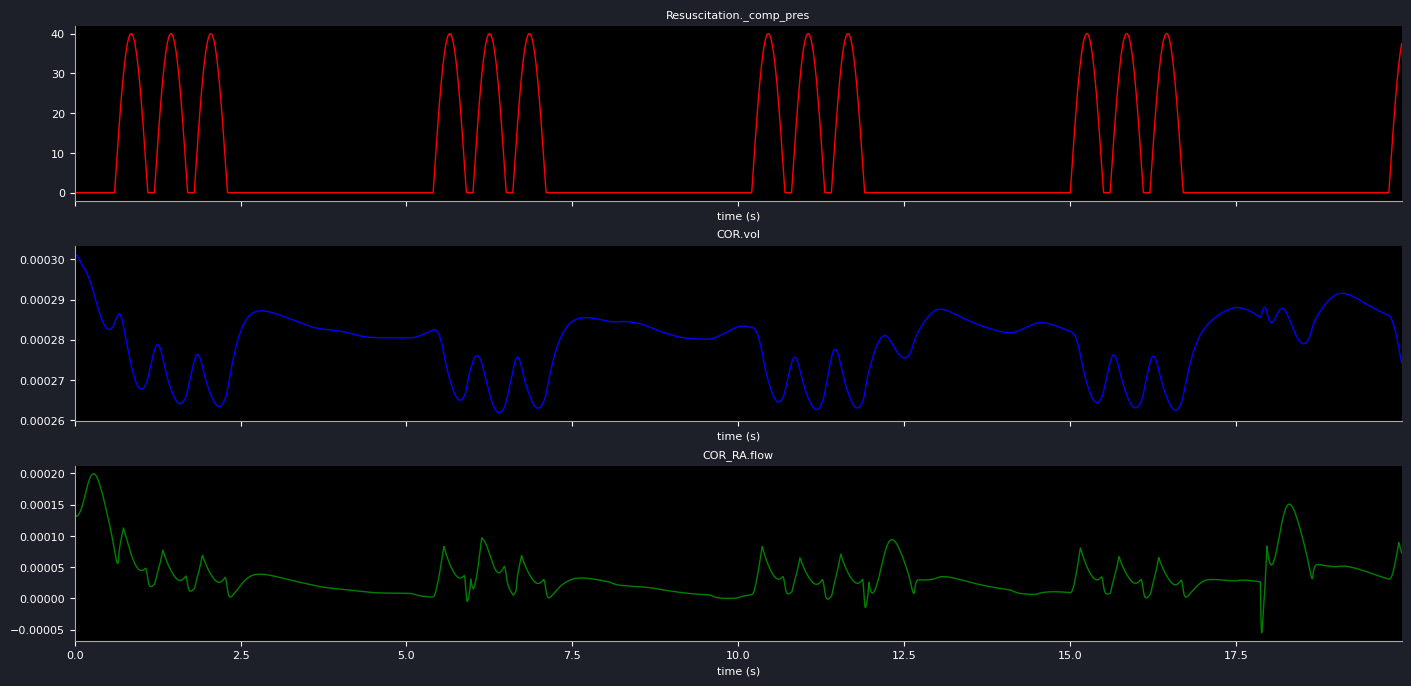

Resuscitation._comp_pres: max       40.0 min        0.0
COR.vol         : max    0.30145, min    0.26181 ml
COR_RA.flow     : net    2.10225, forward    2.10919, backward   -0.00694 ml/min, stroke volume:    0.23358 ml, 


In [2]:
# start cpr 
models["Resuscitation"].start_cpr()

# override the heartrate
models["Resuscitation"].set_heartrate(10)

# set the ratio compressions:ventilations or select asynchronous mode
models["Resuscitation"].compressions = 3.0
models["Resuscitation"].ventilations = 1.0
models["Resuscitation"].async_ventilation = False

# set the compressions properties
models["Resuscitation"].chest_comp_freq = 100.0
models["Resuscitation"].chest_comp_pres = 40.0
models["Resuscitation"].chest_comp_time = 0.5

# set the ventilation properties
models["Resuscitation"].vent_pres = 4.0
models["Resuscitation"].vent_freq = 30.0

# plot the compressions brain and coronary flow
neo.plot_time_graph(
    ["Resuscitation._comp_pres", "COR.vol","COR_RA.flow"],
    combined=False,
    sharey=False,
    sampleinterval=0.0005,
    fill=False,
    time_to_calculate=20,
)